In [69]:
import pandas as pd

In [70]:
# Number of subjects
n = 10000

In [71]:
# Generate a random dataset
%run utils/Generator.py
data = generate_banking_dataset(n)

In [72]:
# Apply corrections and introduce correlation
%run utils/Correlation.py
correlate_balance_employment_type(data)
correlate_balance_region(data)
correlate_tot_transaction_amount_credit_score(data)

In [73]:
# Export of the dataset
RD = pd.DataFrame(data)
RD.to_csv('../data/real_data/d1.csv', index=False)

In [74]:
# Add the DataFrame to the dictionary
datasets = {}
datasets['d1'] = RD

In [76]:
# Generate metadata
%run utils/Generator.py
metadata = generate_metadata_mt(RD)
# Export metadata json
metadata.save_to_json('../data/metadata/metadata_mt_d1.json')

In [86]:
from sdv.multi_table import HMASynthesizer
synthesizer = HMASynthesizer(metadata)
synthesizer.validate(datasets)

#Initialize the SDV model and fit it to the DataFrame:
synthesizer.fit(datasets)

# Generate synthetic data using the SDV model:
SD = synthesizer.sample(scale=1)

# Export synthetic dataset
SD['d1'].to_csv('../data/synthetic_data/HMA_d1.csv', index=False)
SD = pd.DataFrame(SD['d1'])

c:\Users\david\miniconda3\envs\SDV_env\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'Credit_Score'. Data will not be rounded.
  warnings.warn(


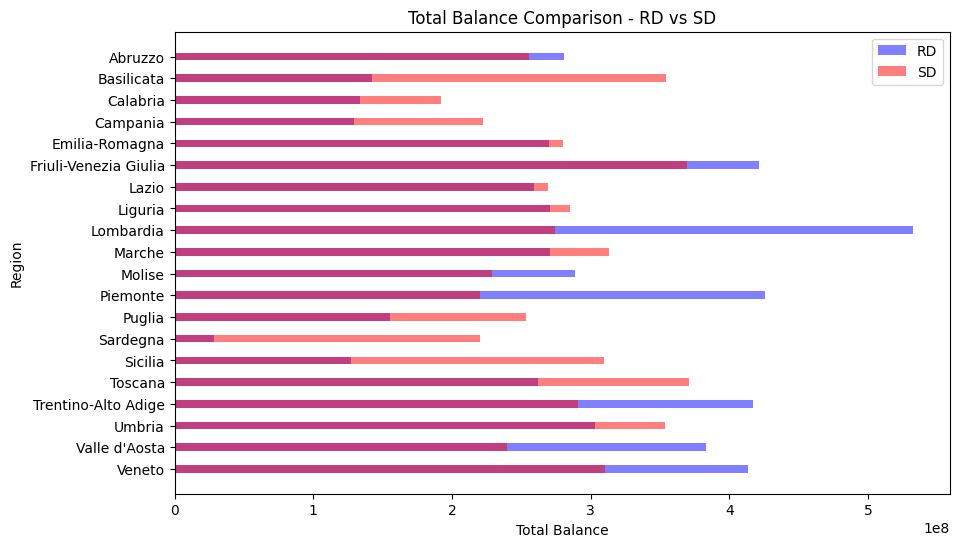

In [89]:
# Visualization tools
%run utils/Visualisation.py
plot_region_balance_comparison(RD, SD)